# Assignment 5

Group: Mathias Husted, Luciana Amarante, Leonie Kochs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We are given the initial value problem

$$
x'(t) = \lambda x(t), \hspace{35pt} x(0)=x_0
$$

### a)


In [2]:
# A represents our lambda
def explicitEuler(A, x0, T, n):
    x = np.zeros(n)
    x[0] = x0 # Start value
    tau = T/n
    for i in range(1,n):
        x_next = x[i-1] + tau * A * x[i-1]
        x[i] = x_next
    return x

### b)

The implicit Euler method states:

$$
x_{k+1} = x_k + h f(t_{k+1}, x_{k+1})
$$

And for our function it is 
$$
x_{k+1} = x_k + \tau \lambda x_{k+1}, \hspace{35pt}k=0,...,n-1
$$

We can derive the following

$$
x_{k+1} - \tau \lambda x_{k+1} = x_{k}
$$

$$
x_{k+1} (1 - \tau \lambda) = x_k \Rightarrow x_{k+1} = \frac{x_k}{(1-\tau \lambda)}
$$

This lets us implicitly calculate our $x_{k+1}$:

In [8]:
def implicitEuler(A, x0, T, n):
    x = np.zeros(n)
    x[0] = x0
    tau = T/n
    for i in range(1,n):
        x_next = x[i-1] / (1 - tau * A)
        x[i] = x_next
    return x

### c)

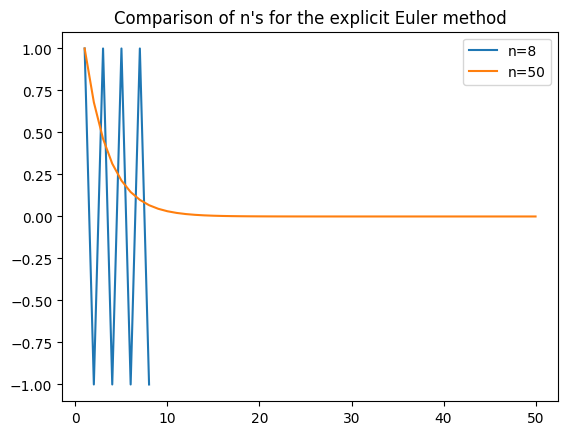

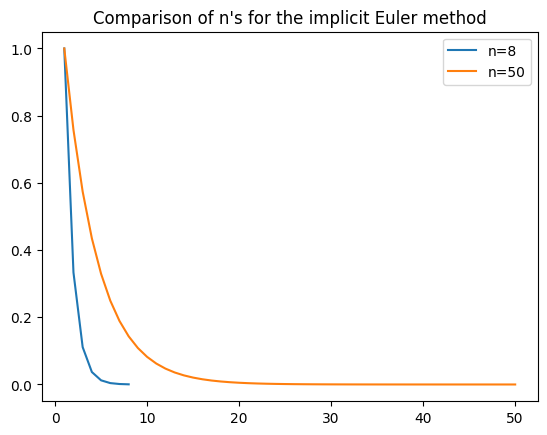

In [9]:
ex8 = explicitEuler(-16, 1, 1, 8)
ex50 = explicitEuler(-16, 1, 1, 50)
im8 = implicitEuler(-16, 1, 1, 8)
im50 = implicitEuler(-16, 1, 1, 50)

plt.plot(range(1,9), ex8, label="n=8")
plt.plot(range(1,51), ex50, label="n=50")
plt.legend()
plt.title("Comparison of n's for the explicit Euler method")
plt.show()

plt.plot(range(1,9), im8, label="n=8")
plt.plot(range(1,51), im50, label="n=50")
plt.legend()
plt.title("Comparison of n's for the implicit Euler method")
plt.show()

As we've seen in the lecture, the implicit Euler method generally gives us better results for lower n's, whereas the explicit method gives us a zig-zag line.

This can be explained by our step size being too big. The approximation assumes the function behaves linearly between steps, and since the current state of the system is necessary to calculate the next step, it makes too big jumps between our x's. It can be seen as an "overcorrection", since it is only able to correct by a way too big value. The result can be seen in the diagram.